100%|██████████| 170498071/170498071 [00:06<00:00, 24695934.43it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch [1/20], Loss: 0.0162
Epoch [2/20], Loss: 0.0071
Epoch [3/20], Loss: 0.0055
Epoch [4/20], Loss: 0.0047
Epoch [5/20], Loss: 0.0043


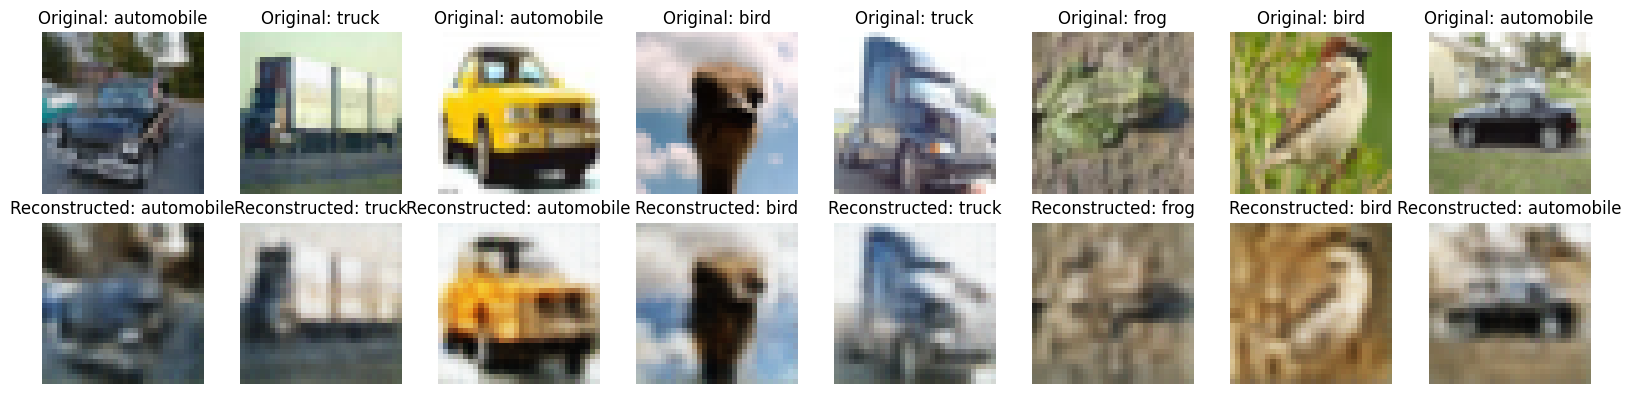

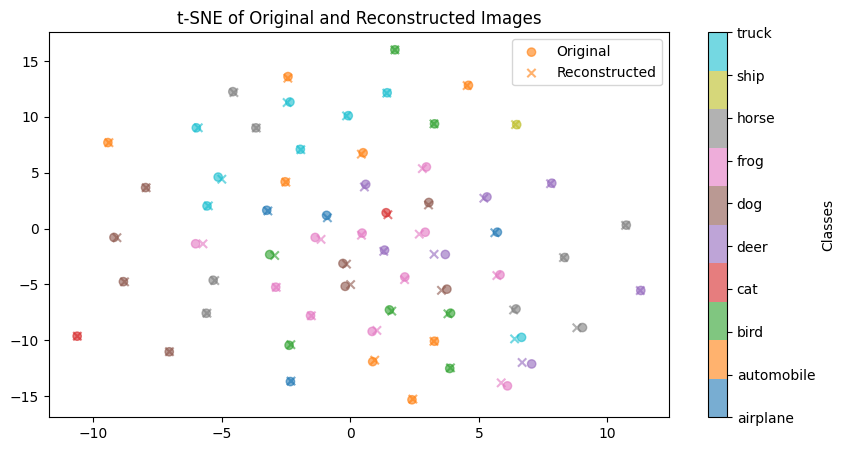

Epoch [6/20], Loss: 0.0041
Epoch [7/20], Loss: 0.0037
Epoch [8/20], Loss: 0.0033
Epoch [9/20], Loss: 0.0031
Epoch [10/20], Loss: 0.0030


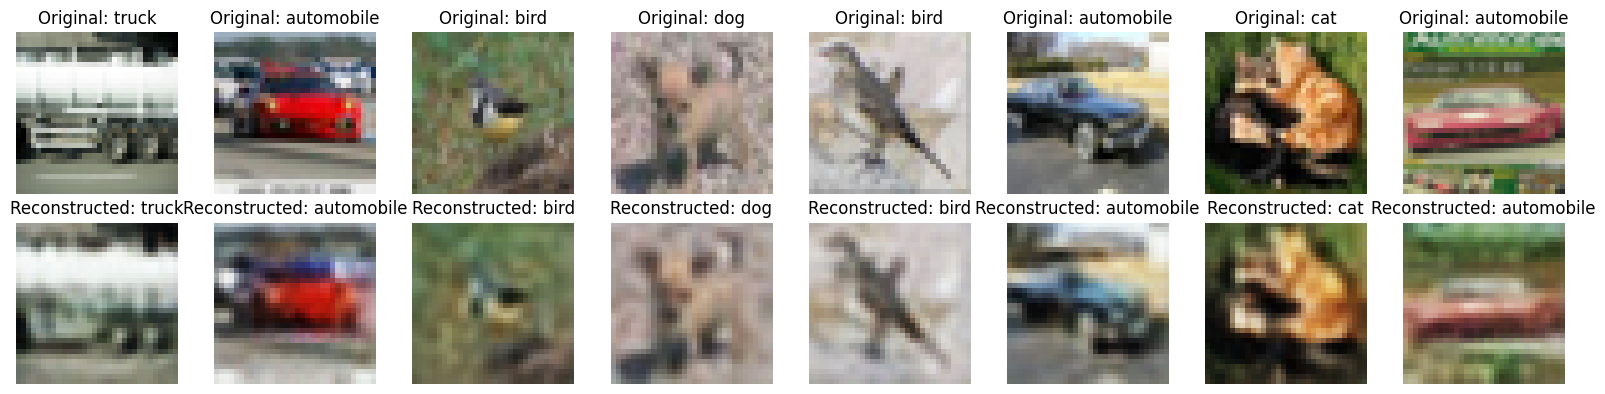

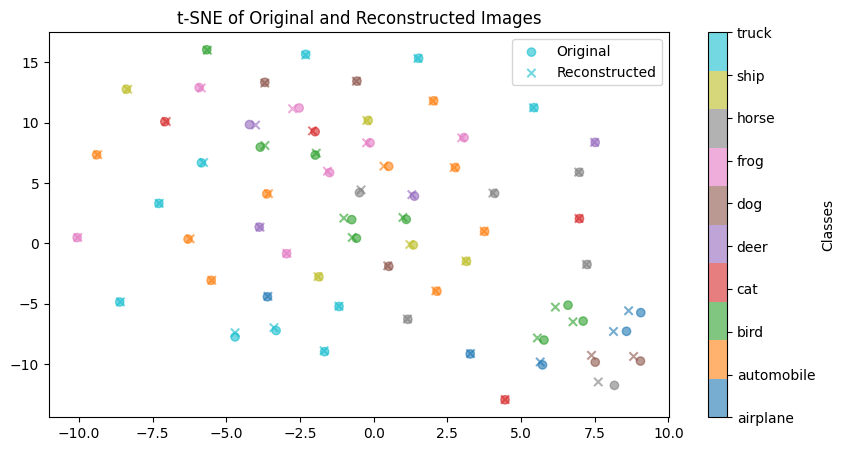

Epoch [11/20], Loss: 0.0028
Epoch [12/20], Loss: 0.0026
Epoch [13/20], Loss: 0.0024
Epoch [14/20], Loss: 0.0022
Epoch [15/20], Loss: 0.0021


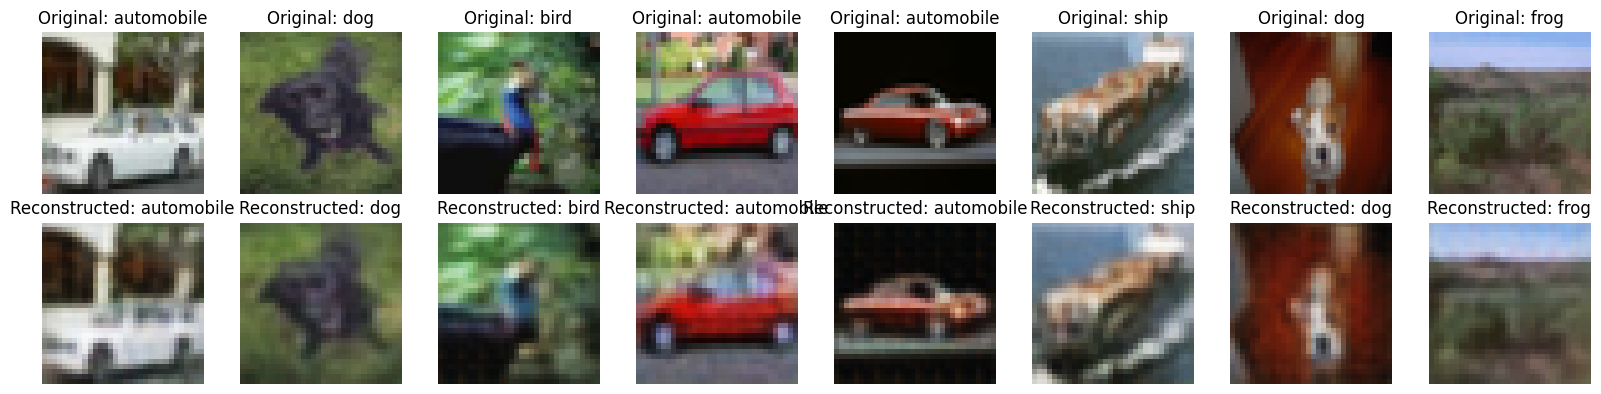

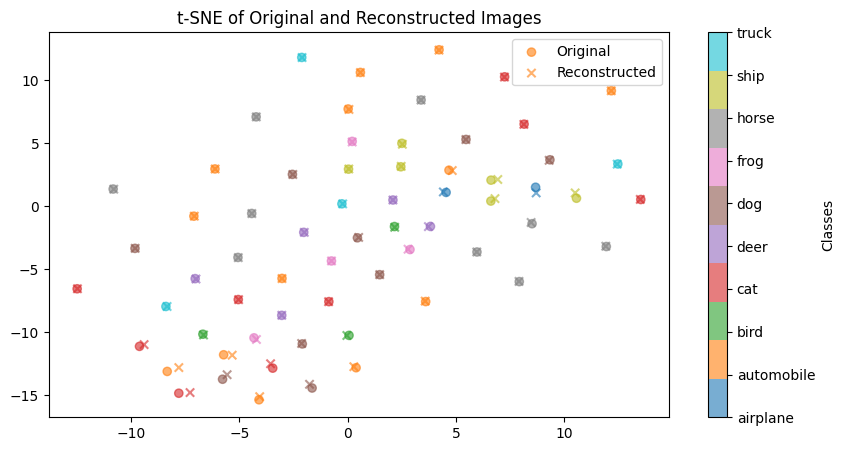

Epoch [16/20], Loss: 0.0020
Epoch [17/20], Loss: 0.0018
Epoch [18/20], Loss: 0.0018
Epoch [19/20], Loss: 0.0017
Epoch [20/20], Loss: 0.0016


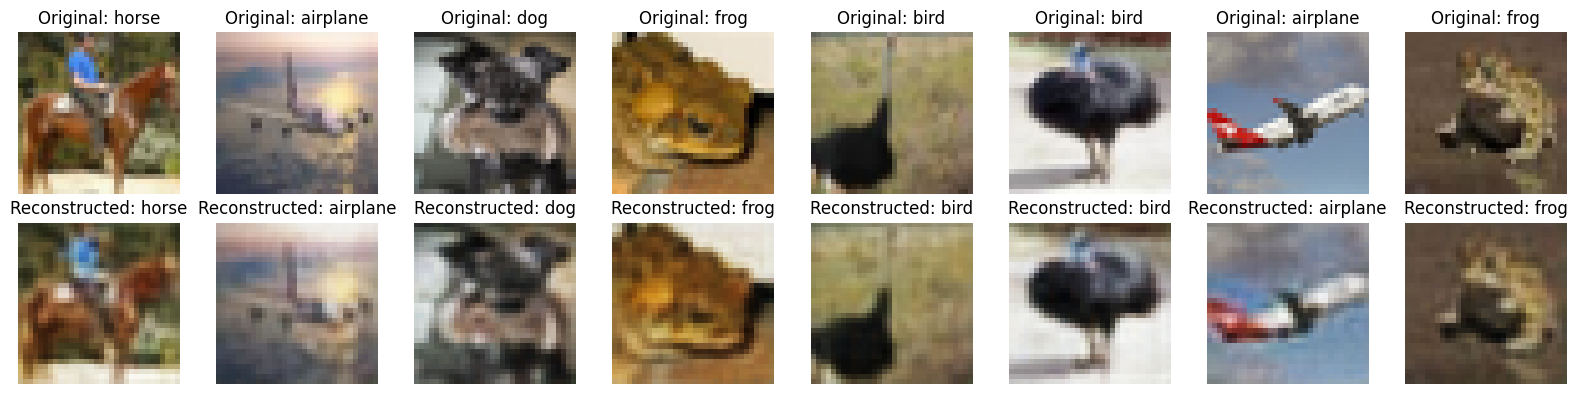

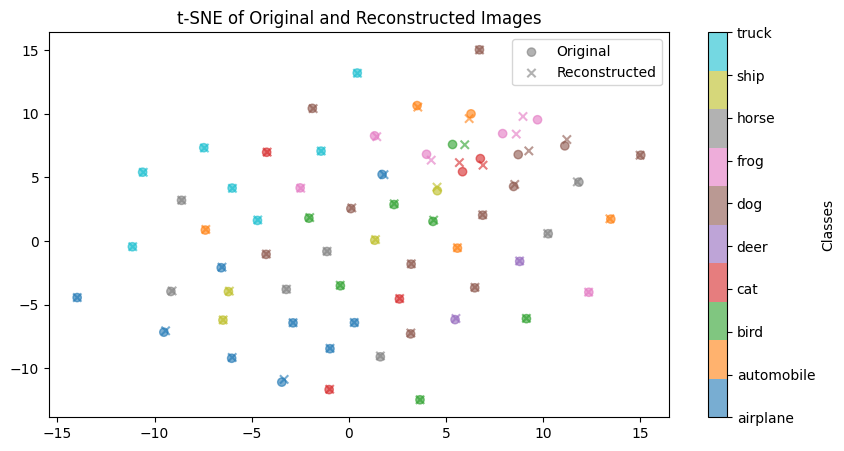

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms

from ae import ConvAutoencoder
from utils import visualize_tsne, visualize_reconstruction

# Function to train the autoencoder model
def train(model, optimizer, train_loader, device, dataset, num_epochs=20):
    # Loop over the number of epochs
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0

        # Loop over the training data in batches
        for images, _ in train_loader:
            images = images.to(device)

            # Forward pass
            outputs = model(images)  # Reconstruct images through the model
            loss = criterion(outputs, images)  # Calculate loss between original and reconstructed images

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        # Calculate average loss per epoch
        train_loss /= len(train_loader)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')

        # Visualize the reconstructed images and t-SNE every 5 epochs
        if (epoch + 1) % 5 == 0:
            sample_images, sample_labels = next(iter(train_loader))
            visualize_reconstruction(model, sample_images, sample_labels, device, dataset)
            visualize_tsne(model, sample_images, sample_labels, device, dataset)

if __name__ == '__main__':

    # Convert images to tensors
    transform = transforms.Compose([
        transforms.ToTensor()
    ])

    # Load CIFAR-10 training dataset
    train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

    # Load CIFAR-10 test dataset
    test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

    # Set device to 'cuda' if GPU is available, otherwise 'cpu'
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Define the model
    model = ConvAutoencoder().to(device)

    # Initialize the loss function
    criterion = nn.MSELoss()

    # Initialize optimizer
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train the model
    train(model, optimizer, train_loader, device, train_dataset)
